In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [2]:
cd downloads

/Users/apple/Downloads


In [3]:
ls

-pareto-chart (1).xls
-pareto-chart.xls
001_introduction.mp4
002_setting_up (1).mp4
003_selecting_and_creating_elements (1).mp4
004_exercise_1 (1).mp4
005_svg.mp4
006_exercise_2 (1).mp4
007_binding_data_and_creating_elements_from_data.mp4
008_exercise_3.mp4
009_transitions (1).mp4
01-iForum - Data Science.pptx
010_scales.mp4
011_axes.mp4
012_advanced_techniques.mp4
013_conclusion.mp4
06 - Putting Together a Business Plan - Borys Chabursky.pps
0617_Microsoft_Azure_Healthcare_WP.pdf
1. Data Science overview - part1.pptx
101000165836_15-2.PDF
101000165836_15.PDF
11248313-0-Certified-Data-Scien.pdf
16221.ppt
194bcff35001e7eb53a2a8b441e8b2c6-92200bc0a673d5ce2110aaad4544ed6c4010f687/
2+-+databases+v2.pdf
2.0-internal-dialogue-sp25.pdf
20-python-libraries-you-arent-using-but-should.epub
2013-12-31-What-Is-Physician-Informatics.pdf
20151117-master.csv
2017-04-19-PHOTO-00000066.jpg
21600-User_guide.pdf
42f0f4f962e4b9130e24fe09bac60b002c16cc8bde9ecc2693dc6799a698515c-other.xml
4a-walking-meditat

In [4]:
df1 = pd.read_excel('credit_card.xlsx',delim_whitespace = True)
print(df1)

    CLIENTNUM   Attrition_Flag   Dependent_count   Customer_Age   \
0         2490                0                 4             43   
1         2690                0                 4             31   
2         3706                0                 4             35   
3         2354                0                 1             60   
4         4281                1                 5             26   
5         3200                1                 5             41   
6         2131                0                 4             47   
7         4882                0                 5             30   
8         2447                0                 1             42   
9         4369                0                 1             52   
10        3849                0                 2             21   
11        1081                1                 4             30   
12        1180                1                 4             22   
13        4381                0                 

In [5]:
columns = ['CLIENTNUM', 'Attrition_Flag', 'Dependent_count', 'Customer_Age', 'Months_on_book',
           'Gender', 'Card_Category', 'Total_Revolving_Bal', 'Credit_Limit',
           'Education_Level', 'Marital_Status', 'Income_Category', 'Trans_Amt_Oct12',
           'Trans_Amt_Nov12', 'Trans_Amt_Dec12', 'Trans_Amt_Jan13',
           'Trans_Amt_Feb13', 'Trans_Amt_Mar13', 'Trans_Count_Oct12', 'Trans_Count_Nov12', 'Trans_Count_Dec12','Trans_Count_Jan13',
           'Trans_Count_Feb13','Trans_Count_Mar13','Months_Inactive_12_mon','Total_Relationship_Count','Contacts_Count_12_mon']

In [6]:
df1.columns = columns

In [7]:
credit=pd.DataFrame(df1)
credit.head(5)

,CLIENTNUM,Attrition_Flag,Dependent_count,Customer_Age,Months_on_book,Gender,Card_Category,Total_Revolving_Bal,Credit_Limit,Education_Level,...,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13,Months_Inactive_12_mon,Total_Relationship_Count,Contacts_Count_12_mon
0,2490,0,4,43,13,M,Blue,15,4759,HighSchool,...,41,0,0,1,4,1,3,12,3,4
1,2690,0,4,31,44,F,Silver,3379,4077,Graduate,...,492,0,4,5,0,2,4,7,1,2
2,3706,0,4,35,22,F,Silver,2562,9361,Uneducated,...,300,0,3,1,1,4,3,4,2,2
3,2354,0,1,60,53,M,Silver,0,3794,Unknown,...,32,1,5,2,4,5,2,12,3,1
4,4281,1,5,26,8,M,Silver,1605,3022,Uneducated,...,296,3,4,3,0,1,2,1,4,5


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 27 columns):
CLIENTNUM                   29 non-null int64
Attrition_Flag              29 non-null int64
Dependent_count             29 non-null int64
Customer_Age                29 non-null int64
Months_on_book              29 non-null int64
Gender                      29 non-null object
Card_Category               29 non-null object
Total_Revolving_Bal         29 non-null int64
Credit_Limit                29 non-null int64
Education_Level             29 non-null object
Marital_Status              29 non-null object
Income_Category             29 non-null object
Trans_Amt_Oct12             29 non-null int64
Trans_Amt_Nov12             29 non-null int64
Trans_Amt_Dec12             29 non-null int64
Trans_Amt_Jan13             29 non-null int64
Trans_Amt_Feb13             29 non-null int64
Trans_Amt_Mar13             29 non-null int64
Trans_Count_Oct12           29 non-null int64
Trans_Count_Nov12 

In [9]:
credit.Attrition_Flag.value_counts()

0    22
1     7
Name: Attrition_Flag, dtype: int64

In [10]:
credit.describe()

,CLIENTNUM,Attrition_Flag,Dependent_count,Customer_Age,Months_on_book,Total_Revolving_Bal,Credit_Limit,Trans_Amt_Oct12,Trans_Amt_Nov12,Trans_Amt_Dec12,...,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13,Months_Inactive_12_mon,Total_Relationship_Count,Contacts_Count_12_mon
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2721.241379,0.241379,3.000000,36.758621,28.068966,2528.344828,5189.344828,262.793103,239.000000,262.137931,...,292.137931,1.965517,2.448276,2.758621,2.379310,2.000000,2.931034,6.517241,2.655172,3.206897
std,1182.582847,0.435494,1.535299,11.909346,17.580287,1464.094046,2450.062598,143.204743,164.565879,159.819033,...,137.966539,1.721352,1.681543,1.704095,1.677877,1.732051,1.533694,3.591863,1.232763,1.319613
min,1013.000000,0.000000,1.000000,19.000000,2.000000,0.000000,1251.000000,44.000000,13.000000,18.000000,...,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2008.000000,0.000000,1.000000,29.000000,13.000000,1606.000000,3113.000000,115.000000,86.000000,118.000000,...,195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000
50%,2690.000000,0.000000,4.000000,35.000000,24.000000,2713.000000,5001.000000,289.000000,255.000000,235.000000,...,300.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,6.000000,3.000000,3.000000
75%,3687.000000,0.000000,4.000000,44.000000,43.000000,3727.000000,7022.000000,376.000000,402.000000,410.000000,...,419.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,10.000000,4.000000,4.000000
max,4882.000000,1.000000,5.000000,60.000000,58.000000,4920.000000,9749.000000,484.000000,498.000000,488.000000,...,492.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,4.000000,5.000000


In [11]:
credit.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Dependent_count', 'Customer_Age',
       'Months_on_book', 'Gender', 'Card_Category', 'Total_Revolving_Bal',
       'Credit_Limit', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Trans_Amt_Oct12', 'Trans_Amt_Nov12', 'Trans_Amt_Dec12',
       'Trans_Amt_Jan13', 'Trans_Amt_Feb13', 'Trans_Amt_Mar13',
       'Trans_Count_Oct12', 'Trans_Count_Nov12', 'Trans_Count_Dec12',
       'Trans_Count_Jan13', 'Trans_Count_Feb13', 'Trans_Count_Mar13',
       'Months_Inactive_12_mon', 'Total_Relationship_Count',
       'Contacts_Count_12_mon'],
      dtype='object')

In [12]:
list( credit.columns )

['CLIENTNUM',
 'Attrition_Flag',
 'Dependent_count',
 'Customer_Age',
 'Months_on_book',
 'Gender',
 'Card_Category',
 'Total_Revolving_Bal',
 'Credit_Limit',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Trans_Amt_Oct12',
 'Trans_Amt_Nov12',
 'Trans_Amt_Dec12',
 'Trans_Amt_Jan13',
 'Trans_Amt_Feb13',
 'Trans_Amt_Mar13',
 'Trans_Count_Oct12',
 'Trans_Count_Nov12',
 'Trans_Count_Dec12',
 'Trans_Count_Jan13',
 'Trans_Count_Feb13',
 'Trans_Count_Mar13',
 'Months_Inactive_12_mon',
 'Total_Relationship_Count',
 'Contacts_Count_12_mon']

In [13]:
drop_list = ['CLIENTNUM','Card_Category','Total_Revolving_Bal','Total_Relationship_Count',
             'Dependent_count','Trans_Count_Nov12','Trans_Count_Jan13','Trans_Count_Mar13','Trans_Amt_Feb13','Months_Inactive_12_mon']
credit = credit.drop(drop_list,axis=1)

In [14]:
credit

,Attrition_Flag,Customer_Age,Months_on_book,Gender,Credit_Limit,Education_Level,Marital_Status,Income_Category,Trans_Amt_Oct12,Trans_Amt_Nov12,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Dec12,Trans_Count_Feb13,Contacts_Count_12_mon
0,0,43,13,M,4759,HighSchool,Married,$60k-$80k,430,450,115,245,41,0,1,1,4
1,0,31,44,F,4077,Graduate,Married,less than $40k,62,317,398,472,492,0,5,2,2
2,0,35,22,F,9361,Uneducated,Divorced,$40k-$60k,291,283,18,207,300,0,1,4,2
3,0,60,53,M,3794,Unknown,Unknown,$60k-$80k,272,13,488,436,32,1,2,5,1
4,1,26,8,M,3022,Uneducated,Married,$80k-$120k,86,29,64,487,296,3,3,1,5
5,1,41,27,M,1251,Graduate,Married,less than $40k,333,480,235,125,217,2,0,1,2
6,0,47,23,M,5603,Graduate,Married,less than $40k,255,15,225,335,245,4,1,0,3
7,0,30,40,M,3755,Graduate,Unknown,$60k-$80k,461,177,51,368,232,2,5,2,3
8,0,42,58,F,9749,HighSchool,Divorced,$80k-$120k,388,86,410,481,463,5,5,5,5
9,0,52,26,F,2744,HighSchool,Single,$80k-$120k,397,84,23,282,165,0,4,1,5


In [15]:
# Define your own bins
mybins = range(0, credit.Customer_Age.max(), 10)

# Cut the data with the help of the bins
credit['age_bucket'] = pd.cut(credit.Customer_Age, bins=mybins)

# Count the number of values per bucket
credit['age_bucket'].value_counts()

(20, 30]    9
(40, 50]    6
(30, 40]    6
(10, 20]    2
(0, 10]     0
Name: age_bucket, dtype: int64

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
Attrition_Flag           29 non-null int64
Customer_Age             29 non-null int64
Months_on_book           29 non-null int64
Gender                   29 non-null object
Credit_Limit             29 non-null int64
Education_Level          29 non-null object
Marital_Status           29 non-null object
Income_Category          29 non-null object
Trans_Amt_Oct12          29 non-null int64
Trans_Amt_Nov12          29 non-null int64
Trans_Amt_Dec12          29 non-null int64
Trans_Amt_Jan13          29 non-null int64
Trans_Amt_Mar13          29 non-null int64
Trans_Count_Oct12        29 non-null int64
Trans_Count_Dec12        29 non-null int64
Trans_Count_Feb13        29 non-null int64
Contacts_Count_12_mon    29 non-null int64
age_bucket               23 non-null category
dtypes: category(1), int64(13), object(4)
memory usage: 4.0+ KB


In [25]:
X_features = list( credit.columns)
X_features.remove( 'Attrition_Flag' )
features

array(['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Trans_Amt_Oct12',
       'Trans_Amt_Nov12', 'Trans_Amt_Dec12', 'Trans_Amt_Jan13',
       'Trans_Count_Oct12', 'Trans_Count_Dec12', 'Trans_Count_Feb13',
       'Contacts_Count_12_mon'], 
      dtype='<U21')

In [18]:
credit_df_complete = pd.get_dummies( credit[X_features], drop_first = True )

In [19]:
len(credit_df_complete.columns )

29

In [20]:
Y = credit.Attrition_Flag
X = credit_df_complete

In [21]:
X

,Customer_Age,Months_on_book,Credit_Limit,Trans_Amt_Oct12,Trans_Amt_Nov12,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Dec12,...,Marital_Status_Unknown,Marital_Status_Widowed,Income_Category_$60k-$80k,Income_Category_$80k-$120k,Income_Category_less thaln $40k,Income_Category_less than $40k,"age_bucket_(10, 20]","age_bucket_(20, 30]","age_bucket_(30, 40]","age_bucket_(40, 50]"
0,43,13,4759,430,450,115,245,41,0,1,...,0,0,1,0,0,0,0,0,0,1
1,31,44,4077,62,317,398,472,492,0,5,...,0,0,0,0,0,1,0,0,1,0
2,35,22,9361,291,283,18,207,300,0,1,...,0,0,0,0,0,0,0,0,1,0
3,60,53,3794,272,13,488,436,32,1,2,...,1,0,1,0,0,0,0,0,0,0
4,26,8,3022,86,29,64,487,296,3,3,...,0,0,0,1,0,0,0,1,0,0
5,41,27,1251,333,480,235,125,217,2,0,...,0,0,0,0,0,1,0,0,0,1
6,47,23,5603,255,15,225,335,245,4,1,...,0,0,0,0,0,1,0,0,0,1
7,30,40,3755,461,177,51,368,232,2,5,...,1,0,1,0,0,0,0,1,0,0
8,42,58,9749,388,86,410,481,463,5,5,...,0,0,0,1,0,0,0,0,0,1
9,52,26,2744,397,84,23,282,165,0,4,...,0,0,0,1,0,0,0,0,0,0


In [22]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['Customer_Age', 'Months_on_book',
            'Credit_Limit',
            'Trans_Amt_Oct12',
           'Trans_Amt_Nov12', 'Trans_Amt_Dec12', 'Trans_Amt_Jan13',
             'Trans_Count_Oct12',  'Trans_Count_Dec12',
           'Trans_Count_Feb13','Contacts_Count_12_mon'])
clf = RandomForestClassifier()
clf.fit(X[features], credit['Attrition_Flag'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

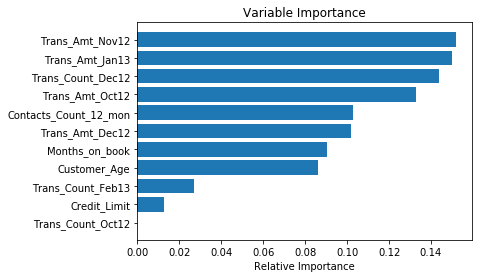

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [245]:
logistic = LogisticRegression()
logistic.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [246]:
logistic.predict(X)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [247]:
import statsmodels.api as sm
logit = sm.Logit(Y,X)

In [248]:
result = logit.fit()

         Current function value: 0.000063
         Iterations: 35


/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [249]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                   29
Model:                          Logit   Df Residuals:                        0
Method:                           MLE   Df Model:                           28
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                  0.9999
Time:                        14:57:37   Log-Likelihood:             -0.0018302
converged:                      False   LL-Null:                       -16.027
                                        LLR p-value:                    0.2724
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Customer_Age                       -1.7338   1.89e+07  -9.17e-08      1.000   -3.71e+07    3.71e+07
Months_on_book                     -0.2641        nan        nan    

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/apple/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/apple/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/apple/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [250]:
print (np.exp(result.params))

Customer_Age                       1.766120e-01
Months_on_book                     7.679006e-01
Credit_Limit                       9.993716e-01
Trans_Amt_Oct12                    1.230836e+00
Trans_Amt_Nov12                    1.016286e+00
Trans_Amt_Dec12                    1.142795e+00
Trans_Amt_Jan13                    1.004137e+00
Trans_Amt_Mar13                    9.612717e-01
Trans_Count_Oct12                  1.825515e+00
Trans_Count_Dec12                  4.709193e-01
Trans_Count_Feb13                  1.002536e+01
Contacts_Count_12_mon              2.063700e-05
Gender_M                           1.373125e+05
Education_Level_Graduate           2.399149e+03
Education_Level_HighSchool         5.632211e+03
Education_Level_Uneducated         3.632470e+25
Education_Level_Unknown            2.325975e-03
Marital_Status_Married             1.924875e+15
Marital_Status_Single              1.401670e+11
Marital_Status_Unknown             1.138286e-01
Marital_Status_Widowed             2.988